In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<b><h3>Text Data: Flattening, Filtering, and Chunking</h3></b>

Bag-of-words is the simplest representation of text based on word count statistics. A related transformation, tf-idf, is essentially a feature scaling technique.

<b><h3>Bag-of-X: Turning Natural Text into Flat Vectors</h3></b>

For text data, we can start with a list of word count statistics called a bag-of-words. For simple tasks such as classifying a document, word count statistics would often suffice. This technique can also be used in information retrieval, where the goal is to retrieve the set of documents that are relevant to an input text query. Both tasks are well served by word-level features because the presence or absence of certain words is a great indicator of the topic content of the document.

<b><h4>Bag-of-Words</h4></b>

In bag-of-words (BoW) featurization, a text document is converted into a vector of counts. (A vector is just a collectioin of n numbers). The vector contains an entry for every possible word in the vocabulary. If the word-say, 'aardvark'- appears three times in the document, then the feature vector has a count of 3 in the position corresponding to that word. If a word in the vocabulary doesnt appear in the document, then it gets a count of 0.

Bag-of-words converts a text document into a flat vector. It is 'flat' because it doesnt contain any of the original textual structures. The original text is a sequence of words. But a bag-of-words has no sequence; it just remembers how many times each word appears in the text. That is, the ordering of words in the vector is not important, as long as it is consistent for all documents in the dataset. Neither does bag-of-words represent any concept of word hierarchy. For example, the concept of animal includes dog, cat, raven etc. But, in a bag of words representation, these words are all equal elements of the vector.

What is important here is the geometry of data in feature space. In a bag-of-words vector, each word becomes a dimension of the vector. If there are n words in the vobulary, then a document becomes a vector in n-dimensional space. 
That is individual words are features (axes) in the bag-of-words representation, and the points in space denote data points (text documents). Sometimes is also informative to look at feature vectors in data space. A feature vector contains the value of the feature in each data point. The axes deonte individual data points, and the points denote feature vectors. With bag-of-words featurization for text documents, a feature is a word and a feature vector contains this word in each documents. In this way, a word is represented as a bag-of-documents. These bag-of-documents vectors come from the matrix transpose of the bag-of-words vectors.

Bag-of-words is not perfect. Breaking down a sentence into single words can destroy the sematic meaning. For instance,  'toy dog' and 'dog toy' could be very different things and the meaning is lost with the singleton words 'toy' and 'dog'.

<b><h4>Bag-of-n-Grams</h4></b>

Bag-of-n-Grams, or bag-of-n-grams, is a natural extension of bag-of-words. An n-gram is a sequence of n tokens. A word is essentially a 1-gram, also known as a unigram. After tokenization, the counting mechanism can collate individual tokens into word counts, or count overlapping sequences as n-grams. For example the sentence 'Emma knocked on the door' generates the n-grams 'Emma knocked', 'knocked on', 'on the', and 'the door.

n-grams retain more of the original sequence structure of the test, and therefore the bag-of-n-grams representation is more informatinve. However, this comes at a cost. Theoretically, with k unique words, there could be k2 unique 2-grams (also known as bigrams). In practice, there are not so many, because not every word can follow every other word. Nevertheless, there are usually a lot more distinct n-grams (n>1) than words (n=1). This means that bag-of-n-grams is a much bigger and sparser feature space. It also means that n-grams are more expensive to compute, store, and model. The larger n is, the richer the information, and the greater the cost.

To compute n-grams with the CountVectorizer() transformer, we have to use a regular expression to indicate what constitutes a word via the token_pattern keyword and the ngram_range keyword which ngram_range a tuple, specifying the lower and upper boundary of the range of n-values; default is (1,1) for unigram only, (1,2) for unigram and bigram, (2,2) for bigrams only.

In [2]:
review_df = pd.read_csv('../datasets/yelp.csv')

In [3]:
review_df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Create feature transformers for unigrams, bigrams, and trigrams
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')

In [5]:
# Fit the transforms and look at vocabulary size
bow_converter.fit(review_df.text)
words = bow_converter.get_feature_names_out()

bigram_converter.fit(review_df.text)
bigrams = bigram_converter.get_feature_names_out()

trigram_converter.fit(review_df.text)
trigrams = trigram_converter.get_feature_names_out()

In [6]:
words[:10]

array(['0', '00', '000', '007', '00a', '00am', '00pm', '01', '02', '03'],
      dtype=object)

In [7]:
bigrams[-10:]

array(['zuzu was', 'zuzus room', 'zweigel wine', 'zwiebel kräuter',
       'zy world', 'zzed in', 'éclairs napoleons', 'école lenôtre',
       'ém all', 'òc châm'], dtype=object)

In [8]:
trigrams[:10]

array(['0 0 eye', '0 20 less', '0 39 oz', '0 39 pizza', '0 5 i',
       '0 50 to', '0 6 can', '0 75 oysters', '0 75 that', '0 75 to'],
      dtype=object)

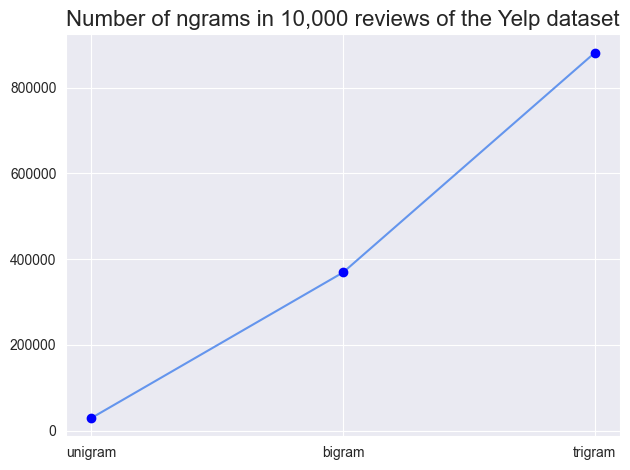

In [9]:

counts = [len(words), len(bigrams), len(trigrams)]

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(counts, color='cornflowerblue')
ax.plot(counts, 'bo')
ax.tick_params(labelsize=10)
ax.margins = 0.1
ax.set_xticks(range(3), ['unigram', 'bigram', 'trigram'])
ax.set_title('Number of ngrams in 10,000 reviews of the Yelp dataset', fontsize=16)
plt.tight_layout()
plt.show()

<b><h3>Filtering for Cleaner Features</h3></b>

With words, how do we cleanly separate the signal from the noise?. Through filtering, techniques that use raw tokenization and counting to generate lists of simple words or n-grams become more usable. There are a few more ways to perform filtering.

<b><h4>Stopwords</h4></b>

Classification and retrieval do not usually require an in-depth understanding of the text. For instance, in the sentence 'Emma knocked on the door', the words 'on' and 'the' don't change the fact that this sentence is about a person and a door. For coarse-grained tasks such as classification, the pronouns, articles and prepositions may not add much value. The case may be very different in sentiment analysis, which requires a fine-grained understanding of semantics.

The popular Python NLP package NLTK contains a linguist-defined stopword list for many languages. Note that the English stopword list contains apostrophes, and the words are uncapitalized. In order to use it as is, the tokenization process must not eat up apostrophes, and the words need to be converted to lowercase.

<b><h4>Frequency-Based Filtering</h4></b>

Stopword lists are a way of weeding out common words that make for vacuous features. There are other, more statistical ways of getting at the concept of 'common words'. We can use frequency statistics here as well.

<b><h5>Frequent words</h5></b>

Frequency statistics are great for filtering out corpus-specific common words as well as general-purpose stopwords. For instance a dataset from the New York Times, phrase 'New York Times' as well as the individual words will appear frequently. These words are meaningful in general, but not within those particular corpora. A typical stopword list will catch the general stopwords, but not corpus-specific ones.

Looking at the most frequent words can reveal parsing problems and highlight normally useful words that happen to appear too many times in the corpus. In practice, it helps to combine frequency-based filtering with a stopword list. There is also the tricky question of where to place the cutoff. Unfortunately, there is no universal answer. Most of the time the cutoff needs to be determined manually, and may need to be reexamined when the dataset changes.

<b><h5>Rare Words</h5></b>

Depending on the task, one might also need to filter out rare words. These might be truly obscure words, or misspellings of common words. To a statistical model, a word that appears in only one or two documents is more like noise than useful information. For example, suppose the task is to categorize businesses based on their Yelp reviews and a single review contains the word 'gobbledygook'. How would one tell, based on this one word, whether the business is a restaurant, a beauty salon, or a bar? Even if we knew that the business in this case happened to be a bar, it would probably be a mistake to classify as such for other reviews that contai the word 'gobbledygook'.

Not only are rare words unreliable as predictors, they also generate computational overhead. A corpus where most of the words occur rarely will have a heavy tailed distribution of words and is very common in real-world data. The training time of many statistical machine learning models scales linearly with the number of features, and some methods are quadratic or worse. Since rare words occur often they incur a large computation and storage cost for not much additional gain.

Rare words can easily be identified and trimmed based on word count statistics. Alternatively, their counts can be aggregated into a special garbage bin, which can serve as an additional feature. The usual words retain their own counts, which can be further filtered by stopword lists or other frequency-based methods. The rare words lose their identity and get grouped into a garbage bin feature. Since one won't know which words are rare until the whole corpus has been counted, the garbage bin feature will need to be collected as a post-processing step.

The concept of rarity also applies to data points. If a text document is very short, then it likely contains no useful information and should not be used when training a model. One must use caution when applying this rule, however. Tweets, are inherently short, and require other featurization and modeling tricks.

<b><h4>Stemming</h4></b>

One problem with simple parsing is that different variations of the same word get counted as separate words. For instance, 'flower' and 'flowers' are techically different tokens, and so are 'swimmer', 'swimming', and 'swim', even though they are very close in meaning. It would be nice if all of these different variations got mapped to the same word. Stemming is an NLP task that tries to chop each word down to its basic linguistic word stem form. There are different approaches. Some are based on liguistic rules, others on observed statistics. A subclass of algorithms incorporate part-of-speech tagging and linguistic rules in a process known as lemmatization.

The Porter stemmmer is the most widely used free stemming tool for the English language. Stemming does have a computational cost. Whether the end benefit outweighs the cost is application dependent. It is also worth noting that stemming could hurt more than it helps. The words new and news have different meanings, but both would be stemmed to new. For this reason, stemming is not always used.

In [10]:
import nltk

stemmer = nltk.stem.porter.PorterStemmer()
stemmer.stem('flowers')

'flower'

In [11]:
stemmer.stem('zeroes')

'zero'

In [12]:
stemmer.stem('stemmer')

'stemmer'

In [13]:
stemmer.stem('sixties')

'sixti'

In [14]:
stemmer.stem('sixty')

'sixti'

In [15]:
stemmer.stem('goes')

'goe'

In [16]:
stemmer.stem('go')

'go'

<b><h3>Atoms of Meaning: From Words to n-Grams to Phrases</h3></b>

The concept of bag-of-words is straightforward. But how does a computer know what a word is? A text document is represented digitally as a string, which is basically a sequence of characters. One might also run into semi-structured text in the form of JSON blobs or HTML pages. But even with the added tags and structure, the basic unit is still a string. How does one turn into a string into a sequence of words? This involves the tasks of parsing and tokenization.

<b><h4>Parsing and Tokenization</h4></b>

Parsing is necessary when the string contains more than plain text. For instance, if the raw data is a web page, an email, or a log of some sort, then it contains additional structure. One needs to decide how to handle the markup, the headers and footers, or the uninteresting sections of the log. If document is a web page, then the parser needs to handle URLs. If it is an email, then fields like From, To, and Subject may require special handling- otherwise these headers will end up as normal words in the final count, which may not be useful.

After light parsing, the plain-test portion of the document can go through tokenization. This turns the string - a sequence of characters - into a sequenc of tokens. Each token can be counted as a word. The tokenizer needs to know what characters indicate that one token has ended and another is beginning. Space characters are usually good separators, as are punctuation characters. If the text contains tweets, then hash marks (#) should not be used as separators also known as delimiters.

Sometimes, the analysis needs to operate on sentences instead of entire documents. For instance, n-grams, a generalizatioin of the concept of a word, should not extend beyond sentence boundaries. More complext text featurization methods like word2vec also work with sentences or paragraphs. In these cases, one needs to first parse the document into sentences, then further tokenize each sentence into words. Also, if the document contains non-ASCII characters, then make sure that the tokenizer can handle that particular encoding. Otherwise, the results will be incorrect.

<b><h4>Collocation Extraction for Phase Detection</h4></b>

A sequence of tokens immediately yields the list of words and n-grams. Sematically speaking, however, we are more used to understanding phrases, not n-grams. In computational natural language processing (NLP), the concept of a useful phrase is called collocation. A collocation is an expression consisting of two or more words that correspond to some conventional way of saying things. Collocations are more meaningful than the sum of their parts. For instance, 'strong tea' has a different meaning beyond 'great physical strength' and 'tea'; therefore, it is considered a collocation. The phrase 'cute puppy' on the other hand, means exactly the sum of its parts: 'cute' and 'puppy'. Thus, it is not considered a collocation.

Collocations do not have to be consecutive sequences. For example, the sentence 'Emma knocked on the door' is considered to contain the collocation 'knock door'. Hence, not every collocation is an n-gram. Conversely, not every n-gram is deemed a meaningful collocation.

Because collocations are more than the sum of their parts, their meaning cannot be adequately captured by individual word counts. Bag-of-words falls short as a representation. Bag-of-n-grams is also problematic because it captures too many meaningless sequences (eg 'this is' 2-gram) and not enough of the meaningful ones (ie 'knock door').

Collocations are useful as features. But how does one discover and extract them from text? One way is to predefine them. If we tried really hard, we could probably find comprehensive lists of idioms in various languages and we could look through the text for any matches. It would be very expensive, but it would work. If the corpus is very domain specific and contains esoteric lingo, then this might be the preferred method. But the list would require a lot of manual curation, and it would need to be constantly updated for evolving corpora. 

There are more statistical methods for finding phrases. Instead of establishing a fixed list of phrases and idiomatic sayings, statistical collocation extraction methods rely on the ever-evolving data to reveal the popular sayings of the day.


<b><h5>Frequecy-based methods</h5></b>

A simple hack is to look at the most frequently occuring n-grams. The problem with this approach is that the most frequently occuring ones may not be the most useful ones as they may be very generic and not contain much meaning.

<b><h5>Hypothesis testing for collocation extraction</h5></b>

Raw popularity count is too crude of a measure. We have to find more clever statistics to be able to pick out meaningful phrases easily. The key idea is to ask whether two words appear together more often than they would by chance. The statistical machinery for answering that question is called hypothesis test. 

Hypothesis testing is a way to boil noisy data down to 'yes' or 'no' answers. It involves modeling the data as samples drawn from random distributions. The randomness means that one can never be 100% sure about the answer; there's always the chance of an outlier. So the answers are attached to a probability. For example, the outcome of a hypothesis test might be "these two datasets come from the same distribution with 95% probability". 

In the context of collocation extraction, one of the most successful methods is based on the likelihood ratio test. For a given pair of words, the method tests two hypotheses on the observed dataset. Hypothesis 1 (the null hypothesis) says that 1 has no bearing on whether we see word 2. Hypothesis 2 (the alternate hypothesis) says that seeing word 1 changes the likelihood of seeing word 2. We take the alternate hypothesis to imply that the two words form a common phrase. Hence, the likelihood ratio test for phrase detection (aka collocation extraction) asks the following question: are the observed word occurrences in a text corpus more likely to have been generated from a model where the two words occur independently from one another, or a model where the probabilities of the two words are entangled?

We can express the null hypothesis H<sub>null</sub>(independent) as P(w<sub>2</sub> | w<sub>1</sub>) = P(w<sub>2</sub> |    not w<sub>1</sub>) 

and the alternate hypothesis H_<sub>alternate</sub>(not independent) as P(w<sub>2</sub> | w<sub>1</sub>) ≠ P(w<sub>2</sub> |    not w<sub>1</sub>) 

The final statistic is the log of the ratio between the two:

log 𝜆 = log( L(Data;H<sub>null</sub>) / L(Data; H_<sub>alternate</sub>) )

The likelihood function L(Data ; H) represents the probability of seeing the word frequencies in the dataset under the independent or the not independent model for the word pair. In order to compute this probability, we have to make another assumption about how the data is generated. The simplest data generatioin model is the binomial model, where for each word in the dataset, we toss a coin, and we insert our special word if the coin comes up heads, and some other word otherwise. Under this strategy, the count of the number of occurrences of the special word follows a binomial distribution. The binomial distribution is completely determined by the total number of words, the number of occurrences of the word of inteest, and the heads probability.

The algorithm for detecting common phrases through likelihood ratio test analysis proceeds as follows:
1. Compute occurrence probabilities for all singleton words: P(w).
2. Compute conditional pairwise word occurrence probabilities for all unique bigrams P(w<sub>2</sub> | w<sub>1</sub>).
3. Compute the likelihood ratio llog 𝜆 for all unique bigrams.
4. Sort the bigrams based on their likelihood ratio.
5. Take the bigrams with the smallest likelihood ratio values as features.

<b><h5>Chunking and part-of-speech tagging</h5></b>

Chunking is a bit more sophisticated than finding n-grams in that it forms sequences of tokens based on parts of speech, using rule-based models. For example, we might be most interested in finding all of the noun phrases in a problem where the entity is the most interesting to us. In order to find this, we tokenize each word with a part of speech and then examine the token's neighborhood to look for part-of-speech groupings, or chunks. The models that map words or parts of speech are generally language specific. Several open source Python libraries, such as NLTK, spaCy, and TextBlob, have multiple language models available.

For the yelp revies, we evaluate the parts of speech to find the noun phrases using both spacy.

In [17]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [18]:
# create a Pandas Series of spaCy nlp variables
doc_df = review_df.text.apply(nlp)

In [19]:
# spaCy gives fine-grained parts of speech using (.pos_) and coarse-grained parts of speech using (.tag_)
for doc in doc_df[4]:
    print([doc.text, doc.pos_, doc.tag_])

['General', 'PROPN', 'NNP']
['Manager', 'PROPN', 'NNP']
['Scott', 'PROPN', 'NNP']
['Petello', 'PROPN', 'NNP']
['is', 'AUX', 'VBZ']
['a', 'DET', 'DT']
['good', 'ADJ', 'JJ']
['egg', 'NOUN', 'NN']
['!', 'PUNCT', '.']
['!', 'PUNCT', '.']
['!', 'PUNCT', '.']
['Not', 'PART', 'RB']
['to', 'PART', 'TO']
['go', 'VERB', 'VB']
['into', 'ADP', 'IN']
['detail', 'NOUN', 'NN']
[',', 'PUNCT', ',']
['but', 'CCONJ', 'CC']
['let', 'VERB', 'VB']
['me', 'PRON', 'PRP']
['assure', 'VERB', 'VB']
['you', 'PRON', 'PRP']
['if', 'SCONJ', 'IN']
['you', 'PRON', 'PRP']
['have', 'VERB', 'VBP']
['any', 'DET', 'DT']
['issues', 'NOUN', 'NNS']
['(', 'PUNCT', '-LRB-']
['albeit', 'ADV', 'RB']
['rare', 'ADJ', 'JJ']
[')', 'PUNCT', '-RRB-']
['speak', 'VERB', 'VBP']
['with', 'ADP', 'IN']
['Scott', 'PROPN', 'NNP']
['and', 'CCONJ', 'CC']
['treat', 'VERB', 'VB']
['the', 'DET', 'DT']
['guy', 'NOUN', 'NN']
['with', 'ADP', 'IN']
['some', 'DET', 'DT']
['respect', 'NOUN', 'NN']
['as', 'SCONJ', 'IN']
['you', 'PRON', 'PRP']
['state', 'V

In [20]:
# spaCy also does some basic noun chunking for us
print([chunk for chunk in doc_df[4].noun_chunks])

[General Manager Scott Petello, a good egg, detail, me, you, you, any issues, Scott, the guy, some respect, you, your case, I, you, I, I, Mistakes, it, we, them, that, Thanks, Scott, his awesome staff, You, a customer, life]
